
___
# Recommender Systems with Python

Welcome to the code notebook for Recommender Systems with Python. In this lecture we will develop basic recommendation systems using Python and pandas.

In this notebook, we will focus on providing a basic recommendation system by suggesting items that are most similar to a particular item, in this case, movies. Keep in mind, this is not a true robust recommendation system, to describe it more accurately,it just tells you what movies/items are most similar to your movie choice.

There is no project for this topic, instead you have the option to work through the advanced lecture version of this notebook (totally optional!).

Let's get started!

## Import Libraries

In [4]:
!pip install missingno


In [93]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# !pip install missingno

# import missingno as msno

## Get the Data

In [2]:
# from google.colab import drive

# drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
# # Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [33]:
# column_names = ['user_id', 'item_id', 'rating', 'timestamp']

# ratings
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Movie-Recommender-in-python-master/u.data', sep='\t', names=column_names)

df = pd.read_csv('./data/ratings_small.csv')
df

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [34]:
df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


Now let's get the movie titles:

In [35]:
# movies_metadata
movie_titles = pd.read_csv('./data/movies_metadata.csv')
# movie_titles.drop(["belongs_to_collection","budget","genres","homepage"	])
# movie_titles = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Movie-Recommender-in-python-master/Movie_Id_Titles")

movie_titles = movie_titles[["id","original_title"]]
# movie_titles = pd.DataFrame(movie_titles,columns=["movieId","title"])
movie_titles.columns=["movieId","title"]
movie_titles.head()
# item_id	title

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,movieId,title
0,862,Toy Story
1,8844,Jumanji
2,15602,Grumpier Old Men
3,31357,Waiting to Exhale
4,11862,Father of the Bride Part II


In [36]:
# msno.bar(movie_titles)
# plt.title("Missing values before dropping")
# plt.show()

In [37]:
# movie_titles = movie_titles.dropna(subset=['movieId'])
movie_titles =pd.DataFrame(movie_titles.dropna())
movie_titles

,movieId,title
0,862,Toy Story
1,8844,Jumanji
2,15602,Grumpier Old Men
3,31357,Waiting to Exhale
4,11862,Father of the Bride Part II
...,...,...
45461,439050,رگ خواب
45462,111109,Siglo ng Pagluluwal
45463,67758,Betrayal
45464,227506,Satana likuyushchiy


In [38]:
# msno.bar(movie_titles)
# plt.title("Missing values after")
# plt.show()

In [39]:

# movie_titles[movie_titles['movieId'].str.contains('1997-08-20')]
movie_titles = movie_titles[pd.to_numeric(movie_titles['movieId'], errors='coerce').notnull()]

In [40]:
# movie_titles["movieId"].apply(lambda s: np.int64(s))
movie_titles['movieId'] = movie_titles['movieId'].astype(int)

<ipython-input-40-5b8a3357a155>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_titles['movieId'] = movie_titles['movieId'].astype(int)


In [41]:
type(df["movieId"][0])

numpy.int64

In [42]:
type(movie_titles["movieId"][0])

numpy.int32

In [43]:
df

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


We can merge them together:

In [44]:
df = pd.merge(df,movie_titles,on='movieId')
df

,userId,movieId,rating,timestamp,title
0,1,1371,2.5,1260759135,Rocky III
1,4,1371,4.0,949810302,Rocky III
2,7,1371,3.0,851869160,Rocky III
3,19,1371,4.0,855193404,Rocky III
4,21,1371,3.0,853852263,Rocky III
...,...,...,...,...,...
44989,652,129009,4.0,1442690827,Love Is a Ball
44990,653,2103,3.0,948161066,Solaris
44991,659,167,4.0,836137550,K-PAX
44992,659,563,3.0,834694187,Starship Troopers


<AxesSubplot:>

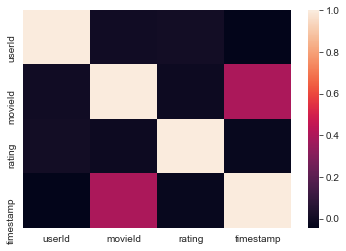

In [98]:
sns.heatmap(df.corr(), 
        xticklabels=df.corr().columns,
        yticklabels=df.corr().columns)

# EDA

Let's explore the data a bit and get a look at some of the best rated movies.

## Visualization Imports

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

Let's create a ratings dataframe with average rating and number of ratings:

In [46]:
df

,userId,movieId,rating,timestamp,title
0,1,1371,2.5,1260759135,Rocky III
1,4,1371,4.0,949810302,Rocky III
2,7,1371,3.0,851869160,Rocky III
3,19,1371,4.0,855193404,Rocky III
4,21,1371,3.0,853852263,Rocky III
...,...,...,...,...,...
44989,652,129009,4.0,1442690827,Love Is a Ball
44990,653,2103,3.0,948161066,Solaris
44991,659,167,4.0,836137550,K-PAX
44992,659,563,3.0,834694187,Starship Troopers


In [47]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Gentlemen Prefer Blondes                 5.0
Anchorman: The Legend of Ron Burgundy    5.0
The Pillow Book                          5.0
Once Upon a Time in Mexico               5.0
Around the World in Eighty Days          5.0
Name: rating, dtype: float64

In [48]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Terminator 3: Rise of the Machines    324
The Million Dollar Hotel              311
Солярис                               304
The 39 Steps                          291
Monsoon Wedding                       274
Name: rating, dtype: int64

In [49]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
!Women Art Revolution,3.250000
'Gator Bait,0.500000
'Twas the Night Before Christmas,4.000000
...Più forte ragazzi!,3.332317
00 Schneider - Jagd auf Nihil Baxter,4.000000


Now set the number of ratings column:

In [50]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
!Women Art Revolution,3.250000,2
'Gator Bait,0.500000,1
'Twas the Night Before Christmas,4.000000,2
...Più forte ragazzi!,3.332317,164
00 Schneider - Jagd auf Nihil Baxter,4.000000,2


Now a few histograms:

<AxesSubplot:>

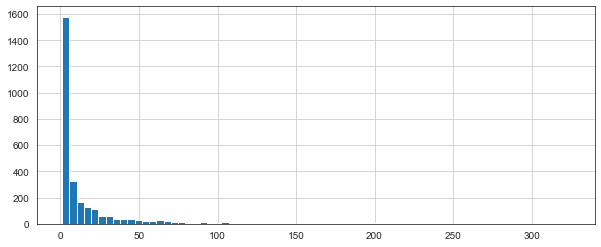

In [51]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

<AxesSubplot:>

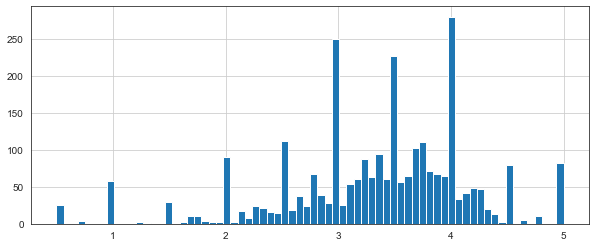

In [52]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

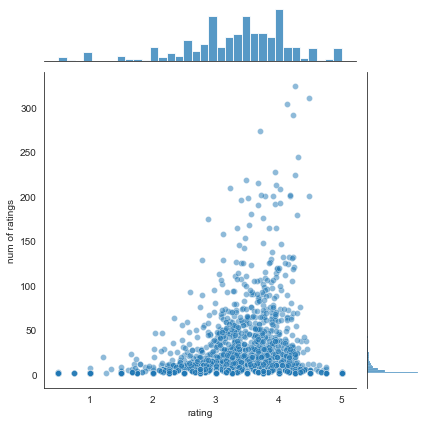

In [53]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

Okay! Now that we have a general idea of what the data looks like, let's move on to creating a simple recommendation system:

## Recommending Similar Movies

Now let's create a matrix that has the user ids on one axis and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [54]:
df

,userId,movieId,rating,timestamp,title
0,1,1371,2.5,1260759135,Rocky III
1,4,1371,4.0,949810302,Rocky III
2,7,1371,3.0,851869160,Rocky III
3,19,1371,4.0,855193404,Rocky III
4,21,1371,3.0,853852263,Rocky III
...,...,...,...,...,...
44989,652,129009,4.0,1442690827,Love Is a Ball
44990,653,2103,3.0,948161066,Solaris
44991,659,167,4.0,836137550,K-PAX
44992,659,563,3.0,834694187,Starship Troopers


In [59]:
moviemat = df.pivot_table(index='userId',columns='title',values='rating')
moviemat.head(20)

title,!Women Art Revolution,'Gator Bait,'Twas the Night Before Christmas,...Più forte ragazzi!,00 Schneider - Jagd auf Nihil Baxter,10 Items or Less,10 Things I Hate About You,"10,000 BC",11'09''01 - September 11,12 + 1,...,사마리아,야수,연가시,오직 그대만,올드보이,"장화, 홍련",최종병기 활,친절한 금자씨,해안선,활
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most rated movie:

In [57]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Terminator 3: Rise of the Machines,4.256173,324
The Million Dollar Hotel,4.487138,311
Солярис,4.138158,304
The 39 Steps,4.221649,291
Monsoon Wedding,3.706204,274
Once Were Warriors,4.303279,244
Trois couleurs : Rouge,3.945175,228
Men in Black II,4.256696,224
La passion de Jeanne d'Arc,3.483945,218


Let's choose two movies: starwars, a sci-fi movie. And Liar Liar, a comedy.

In [60]:
ratings.head()

,rating,num of ratings
title,,
!Women Art Revolution,3.250000,2
'Gator Bait,0.500000,1
'Twas the Night Before Christmas,4.000000,2
...Più forte ragazzi!,3.332317,164
00 Schneider - Jagd auf Nihil Baxter,4.000000,2


In [74]:
ratings

,rating,num of ratings
title,,
!Women Art Revolution,3.250000,2
'Gator Bait,0.500000,1
'Twas the Night Before Christmas,4.000000,2
...Più forte ragazzi!,3.332317,164
00 Schneider - Jagd auf Nihil Baxter,4.000000,2
...,...,...
"장화, 홍련",4.125000,4
최종병기 활,2.250000,4
친절한 금자씨,2.000000,1


Now let's grab the user ratings for those two movies:

In [83]:
terminator_user_ratings = moviemat['Terminator 3: Rise of the Machines']
terminator_user_ratings.head()

userId
1    NaN
2    4.0
3    4.5
4    5.0
5    NaN
Name: Terminator 3: Rise of the Machines, dtype: float64

We can then use corrwith() method to get correlations between two pandas series:

In [75]:
similar_to_terminator = moviemat.corrwith(terminator_user_ratings)
similar_to_terminator

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
!Women Art Revolution                        NaN
'Gator Bait                                  NaN
'Twas the Night Before Christmas        1.000000
...Più forte ragazzi!                  -0.196884
00 Schneider - Jagd auf Nihil Baxter    1.000000
                                          ...   
장화, 홍련                                 -0.814345
최종병기 활                                       NaN
친절한 금자씨                                      NaN
해안선                                    -0.243373
활                                      -0.242681
Length: 2798, dtype: float64

In [99]:
corr_mat= moviemat.corr()
corr_mat

title,!Women Art Revolution,'Gator Bait,'Twas the Night Before Christmas,...Più forte ragazzi!,00 Schneider - Jagd auf Nihil Baxter,10 Items or Less,10 Things I Hate About You,"10,000 BC",11'09''01 - September 11,12 + 1,...,사마리아,야수,연가시,오직 그대만,올드보이,"장화, 홍련",최종병기 활,친절한 금자씨,해안선,활
title,,,,,,,,,,,,,,,,,,,,,
!Women Art Revolution,1.0,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Gator Bait,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Twas the Night Before Christmas,NaN,NaN,1.0,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...Più forte ragazzi!,1.0,NaN,-1.0,1.000000,NaN,0.36051,0.815892,NaN,NaN,-0.14642,...,0.200327,NaN,NaN,-1.0,1.0,NaN,0.5,NaN,-0.064533,-0.112977
00 Schneider - Jagd auf Nihil Baxter,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"장화, 홍련",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
최종병기 활,NaN,NaN,NaN,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
친절한 금자씨,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's clean this by removing NaN values and using a DataFrame instead of a series:

In [77]:
corr_terminator = pd.DataFrame(similar_to_terminator,columns=['Correlation'])
corr_terminator.dropna(inplace=True)
print(len(corr_terminator))
corr_terminator.head()

1556


,Correlation
title,
'Twas the Night Before Christmas,1.000000
...Più forte ragazzi!,-0.196884
00 Schneider - Jagd auf Nihil Baxter,1.000000
10 Items or Less,-0.361158
10 Things I Hate About You,0.487316


Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie). 

In [78]:
corr_terminator.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Merlin,1.0
Gomorra,1.0
La Vie est un long fleuve tranquille,1.0
Terminator 3: Rise of the Machines,1.0
Gremlins,1.0
Still Bill,1.0
Star Trek: First Contact,1.0
Absolute Giganten,1.0
Reflections in a Golden Eye,1.0


Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).

In [79]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

,Correlation,num of ratings
title,,
'Twas the Night Before Christmas,1.000000,2
...Più forte ragazzi!,-0.196884,164
00 Schneider - Jagd auf Nihil Baxter,1.000000,2
10 Items or Less,-0.361158,11
10 Things I Hate About You,0.487316,7


Now sort the values and notice how the titles make a lot more sense:

In [80]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Terminator 3: Rise of the Machines,1.000000,324
Men in Black II,0.472422,224
The Thomas Crown Affair,0.446644,179
Point Break,0.406478,132
The Man with the Golden Arm,0.356941,146
